In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

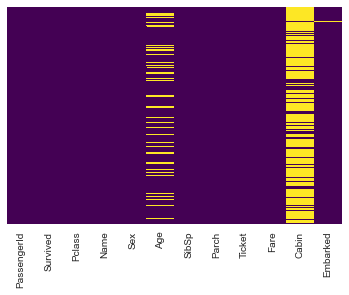

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

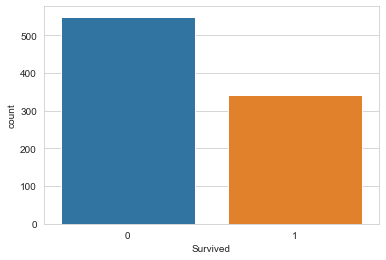

In [10]:
sns.countplot(x='Survived', data=train)

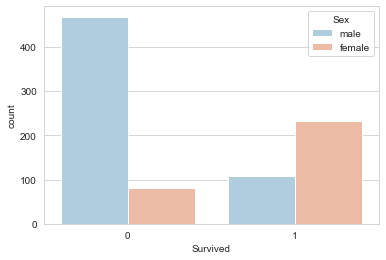

In [13]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

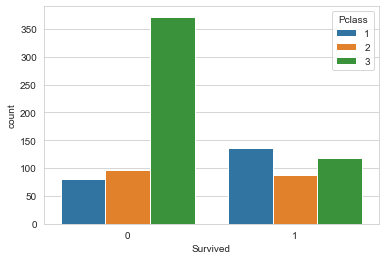

In [14]:
sns.countplot(x='Survived', data=train, hue='Pclass')

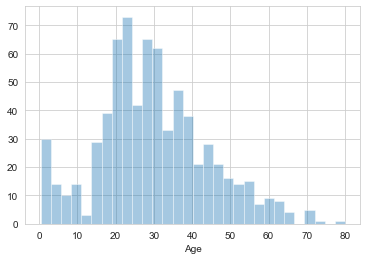

In [15]:
sns.distplot(train['Age'].dropna(), bins=30, kde=False)

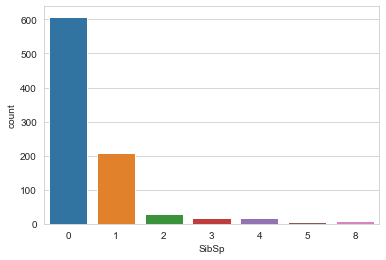

In [22]:
sns.countplot(x='SibSp', data=train)

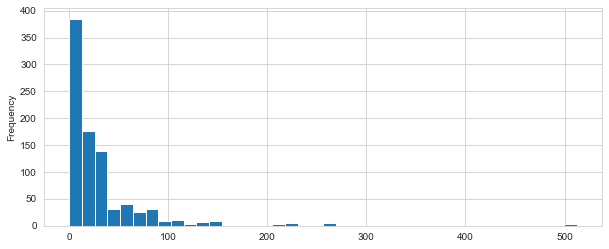

In [25]:
train['Fare'].plot(kind='hist', bins=40, figsize=(10, 4))

In [26]:
import cufflinks as cf

In [27]:
cf.go_offline()

In [28]:
train['Fare'].iplot(kind='hist', bins=40)

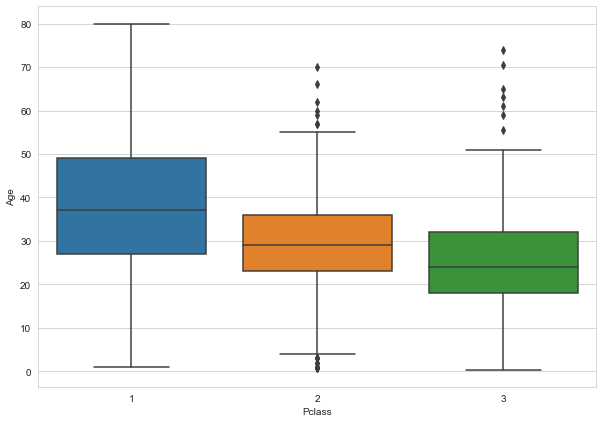

In [31]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [33]:
def impoute_def(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [34]:
train['Age'] = train[['Age', 'Pclass']].apply(impoute_def, axis=1)

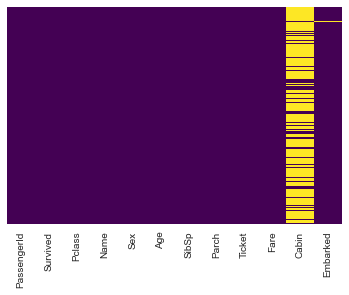

In [35]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

In [37]:
train.drop('Cabin', axis=1, inplace=True)

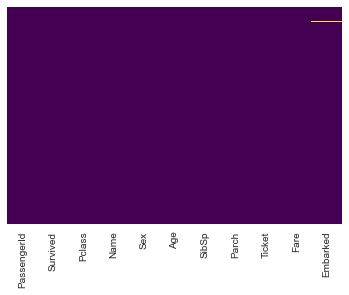

In [38]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

In [39]:
train.dropna(inplace=True)

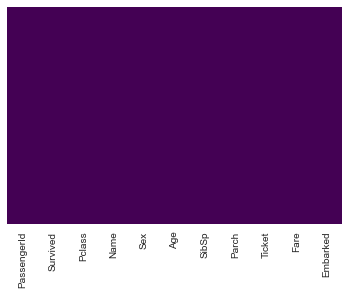

In [40]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

## Replace categorical columns with dummy variables

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [44]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [48]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [50]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [51]:
train = pd.concat([train, sex, embark], axis=1)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [53]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [57]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Build and train model

In [59]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()

In [80]:
logmodel.fit(X_train, y_train)

c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
predictions = logmodel.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

# test model with test dataset

In [88]:
test =  pd.read_csv('titanic_test.csv')

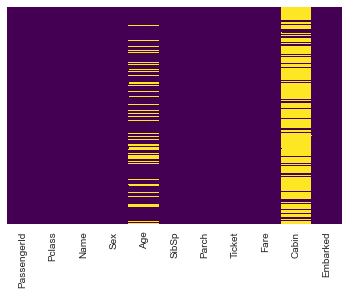

In [92]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

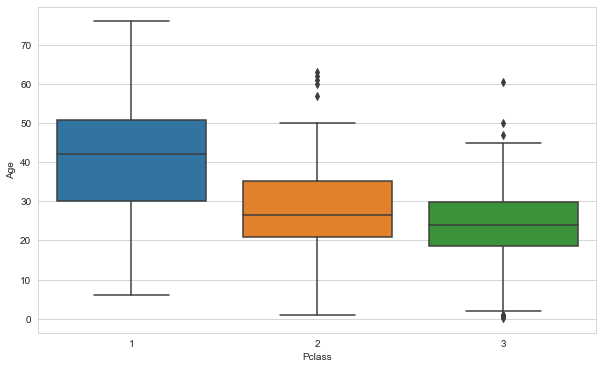

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=test)

In [97]:
def impoute_def(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 43
        elif Pclass == 2:
            return 36
        else:
            return 24
    else:
        return Age

In [98]:
test['Age'] = test[['Age', 'Pclass']].apply(impoute_def, axis=1)

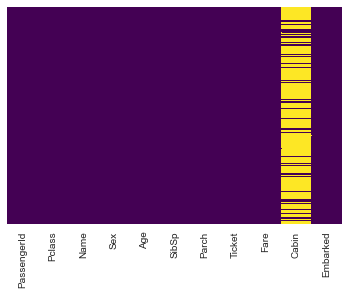

In [99]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [100]:
test.drop('Cabin', axis=1, inplace=True)

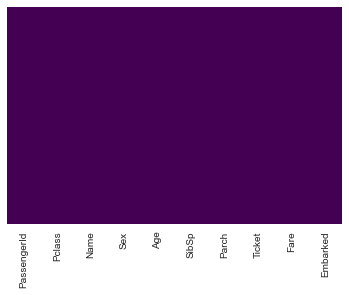

In [101]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [105]:
test.dropna(inplace=True)

In [106]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [107]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [109]:
age = pd.get_dummies(test['Sex'], drop_first=True)

In [111]:
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [131]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [113]:
test = pd.concat([test, age, embark], axis=1)

In [120]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [115]:
test.drop(['Name' ,'Sex', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [119]:
test.drop(['Embarked'], axis=1, inplace=True)

In [122]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [124]:
X_train = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [125]:
y_train = train['Survived']

In [126]:
X_test = test

In [127]:
logmodel.fit(X_train, y_train)

c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
predictions = logmodel.predict(X_test)

In [130]:
#predictions